## 1. Problem Framing

The goal of this project was to develop an image classification model that could accurately predict the name of cricketers from images uploaded to a website. The dataset contained images of cricketers, and the task was to classify each image into one of the predefined categories.

To achieve this, a series of steps were followed such as data acquisition, data preprocessing and cleaning to prepare the data for modeling. Feature engineering was then performed to extract relevant features from the images, and the best model and hyperparameters were selected to train the classification model.

Once the model was trained, its performance was evaluated on a test dataset and fine-tuned as necessary. Finally, the model was integrated into a web application, allowing users to upload images to the website and receive predictions about the cricketer in the image.

The success of the project was determined by the accuracy and efficiency of the model in classifying the images.

## 2. Data Aquisition
To acquire the necessary data for the image classification project, web scraping of Cricketers images was performed from Google. This was achieved by utilizing a [Python script](data_aquisition/web_scrapping.py) that implemented beautiful soup and selenium to download images of Cricketers from Google through beautiful soup. In order to counter block from google after certain requests, delay of 10 seconds between each photo was introduced. Since, at one requests, only 20 images were dropped, Selenium was used to scroll down until end of the page was reached.

## 3. Data Preprocessing and Cleaning
Data preprocessing and cleaning are the most important parts of the data science process. OpenCV was used to input images, and the face_cascade and eye_cascade of the Cascade classifier of the OpenCV library were used to detect faces and eyes. Only images with two eyes were allowed to proceed to the next process to ensure that the model could find patterns in the image accurately. Each image was processed, cropped, and separated into separate folders called "cropped" for feature engineering.


In [1]:
import cv2

In [2]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [4]:
path_data = "./dataset/"
path_cropped_data = "./dataset/cropped/"

In [5]:
import os
img_dirs = [file.path for file in os.scandir(path_data) if file.is_dir()]

In [6]:
import shutil
if os.path.exists(path_cropped_data):
     shutil.rmtree(path_cropped_data)
os.mkdir(path_cropped_data)

In [7]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_cropped_data+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

yuzvendra_chahal
Generating cropped images in folder:  ./dataset/cropped/yuzvendra_chahal
vijay_shankar
Generating cropped images in folder:  ./dataset/cropped/vijay_shankar
shane_warne
Generating cropped images in folder:  ./dataset/cropped/shane_warne
kane_williamson
Generating cropped images in folder:  ./dataset/cropped/kane_williamson
lasith_malinga
Generating cropped images in folder:  ./dataset/cropped/lasith_malinga
rohit_sharma
Generating cropped images in folder:  ./dataset/cropped/rohit_sharma
ricky_ponting
Generating cropped images in folder:  ./dataset/cropped/ricky_ponting
chris_gayle
Generating cropped images in folder:  ./dataset/cropped/chris_gayle
ben_stokes
Generating cropped images in folder:  ./dataset/cropped/ben_stokes
mitchell_starc
Generating cropped images in folder:  ./dataset/cropped/mitchell_starc
dinesh_karthik
Generating cropped images in folder:  ./dataset/cropped/dinesh_karthik
kumar_sangakkara
Generating cropped images in folder:  ./dataset/cropped/kum

After this, the data was cleaned manually. False images were detected manually and deleted.
Since, the data was cleaned we need to update our celebrity name dictionary

In [177]:
celebrity_file_names_dict = {}

for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    try:
        for entry in os.scandir(img_dir):
            file_list.append(entry.path)
    except FileNotFoundError:
        continue
    celebrity_file_names_dict[celebrity_name] = file_list


In [178]:
celebrity_file_names_dict

{'rohit_sharma': ['./dataset/cropped/rohit_sharma/Rohit 66.png',
  './dataset/cropped/rohit_sharma/Rohit 72.png',
  './dataset/cropped/rohit_sharma/Rohit 73.png',
  './dataset/cropped/rohit_sharma/Rohit 67.png',
  './dataset/cropped/rohit_sharma/Rohit 71.png',
  './dataset/cropped/rohit_sharma/Rohit 65.png',
  './dataset/cropped/rohit_sharma/Rohit 59.png',
  './dataset/cropped/rohit_sharma/Rohit 58.png',
  './dataset/cropped/rohit_sharma/Rohit 64.png',
  './dataset/cropped/rohit_sharma/Rohit 70.png',
  './dataset/cropped/rohit_sharma/Rohit 48.png',
  './dataset/cropped/rohit_sharma/Rohit 74.png',
  './dataset/cropped/rohit_sharma/Rohit 60.png',
  './dataset/cropped/rohit_sharma/.DS_Store',
  './dataset/cropped/rohit_sharma/Rohit 61.png',
  './dataset/cropped/rohit_sharma/Rohit 75.png',
  './dataset/cropped/rohit_sharma/Rohit 49.png',
  './dataset/cropped/rohit_sharma/Rohit 63.png',
  './dataset/cropped/rohit_sharma/Rohit 77.png',
  './dataset/cropped/rohit_sharma/Rohit 76.png',
  './da

## 4. Feature Engineering

Feature engineering was done using PyWavelets, which converted the images to wavelet forms after grayscaling them to make the patterns recognizable to the model. Finally, the test train split was performed using scikit-learn, and to handle the data imbalance, the SMOTE oversampling method was used.

In [ ]:
import numpy as np
import pywt

In [179]:
def w2d(imArray, mode='haar', level=1):
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [180]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

In [181]:
class_dict

{'rohit_sharma': 0,
 'ricky_ponting': 1,
 'kumar_sangakkara': 2,
 'virat_kohli': 3,
 'ms_dhoni': 4,
 'sachin_tendulkar': 5}

In [182]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None or img.size == 0:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [183]:
X = np.array(X).astype(float)
y = np.array(y).astype(float)
X.shape

(512, 4096, 1)

In [184]:
X = X.reshape(-1, 4096)
X.shape

(512, 4096)

In [185]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 5. Model Selection

In [186]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [187]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        },
    }
    }

In [189]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_resampled, y_train_resampled)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.973259,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.869985,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.967221,{'logisticregression__C': 1}


## 7. Model Training

In [196]:
model= make_pipeline(StandardScaler(), svm.SVC(C=1, kernel='linear'))
model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

## 8. Model Evaluation

In [197]:
y_pred = model.predict(X_test)

In [198]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        19
         1.0       0.73      0.92      0.81        12
         2.0       0.57      0.36      0.44        11
         3.0       0.91      0.89      0.90        46
         4.0       0.81      0.65      0.72        20
         5.0       0.65      0.85      0.74        20

    accuracy                           0.77       128
   macro avg       0.73      0.73      0.72       128
weighted avg       0.78      0.77      0.77       128



In [193]:
class_dict

{'rohit_sharma': 0,
 'ricky_ponting': 1,
 'kumar_sangakkara': 2,
 'virat_kohli': 3,
 'ms_dhoni': 4,
 'sachin_tendulkar': 5}

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

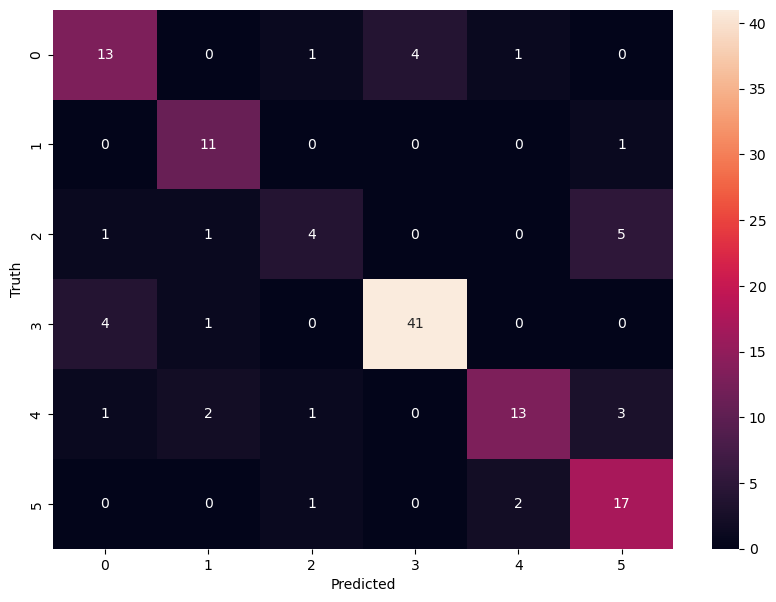

In [195]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [199]:
import joblib 
joblib.dump(model, 'model.pkl')

['model.pkl']

In [200]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

## 8. Model Deployment